https://www.tensorflow.org/tutorials/keras/save_and_load

In [ ]:
import tensorflow as tf

# 데이터 불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
def mnist_train(callbacks, epochs):

  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])  

  # 모델 컴파일하기
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # 모델 학습
  history = model.fit(x_train, y_train, epochs=epochs, validation_data = (x_test, y_test), 
                      callbacks = callbacks)
  
  return model, history



In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.title('loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.figure()
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.legend(['train', 'test'], loc='upper left')



In [ ]:
model1, history1= mnist_train(callbacks = None, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4938 - accuracy: 0.8562 - val_loss: 0.1461 - val_accuracy: 0.9550
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1520 - accuracy: 0.9561 - val_loss: 0.1057 - val_accuracy: 0.9678
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1115 - accuracy: 0.9668 - val_loss: 0.0888 - val_accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0906 - accuracy: 0.9723 - val_loss: 0.0802 - val_accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0756 - accuracy: 0.9759 - val_loss: 0.0796 - val_accuracy: 0.9758


In [ ]:
!mkdir -p saved_model
model1.save('saved_model/model1')

INFO:tensorflow:Assets written to: saved_model/model1/assets


In [ ]:
!ls saved_model/model1

assets	saved_model.pb	variables


In [ ]:
new_model1 = tf.keras.models.load_model('saved_model/model1')

# 모델 구조를 확인합니다
new_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model1.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9758


[0.07963850349187851, 0.9757999777793884]

h5 파일로 저장하기

In [ ]:
model1.save('model1.h5')

In [ ]:
# 가중치와 옵티마이저를 포함하여 정확히 동일한 모델을 다시 생성합니다
new_model2 = tf.keras.models.load_model('model1.h5')

# 모델 구조를 출력합니다
new_model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model2.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9758


[0.07963850349187851, 0.9757999777793884]

In [ ]:
  history = new_model2.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0678 - accuracy: 0.9785 - val_loss: 0.0716 - val_accuracy: 0.9773
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0604 - accuracy: 0.9812 - val_loss: 0.0775 - val_accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0542 - accuracy: 0.9822 - val_loss: 0.0732 - val_accuracy: 0.9782
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9837 - val_loss: 0.0720 - val_accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9850 - val_loss: 0.0704 - val_accuracy: 0.9801
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0427 - accuracy: 0.9861 - val_loss: 0.0742 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0399 - accuracy: 0.9865 - val_loss: 0.0765 - val_accuracy:

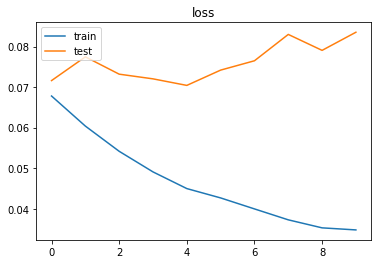

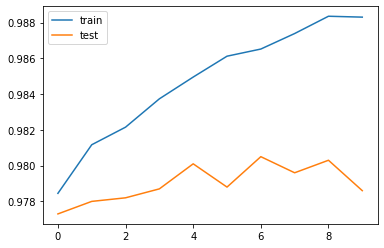

In [ ]:
plot_history(history)